## K-fold ##

In [3]:
import pandas as pd
from sklearn import model_selection

if __name__ == "__main__":
    df = pd.read_csv("datasets/winequality-red.csv")
    
    df["kfold"] = -1
    
    df = df.sample(frac=1).reset_index(drop=True)
    
    kf = model_selection.KFold(n_splits=5)
    for fold, (trn_, val_) in enumerate(kf.split(X=df)):
        df.loc[val_,"kfold"] = fold
    
    df.to_csv("wine_train_folds.csv", index=False)

## Stratified K-Fold ##

In [4]:
import pandas as pd
from sklearn import model_selection

if __name__ == "__main__":
    df = pd.read_csv("datasets/winequality-red.csv")
    
    df["kfold"] = -1
    
    df = df.sample(frac=1).reset_index(drop=True)
    df
    y = df.quality.values
    
    kf = model_selection.StratifiedKFold(n_splits=5)
    for f, (t_, v_) in enumerate(kf.split(X=df, y=y)):
        df.loc[v_,"kfold"] = f
    
    df.to_csv("wine_train_folds.csv", index=False)

Text(0, 0.5, 'count')

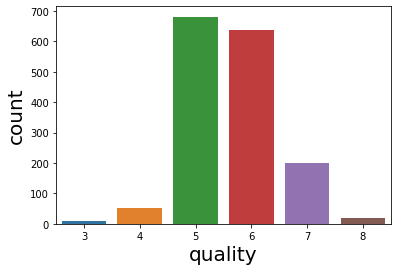

In [5]:
import seaborn as sns
b = sns.countplot(x="quality", data=df)
b.set_xlabel("quality", fontsize=20)
b.set_ylabel("count", fontsize=20)

## Starified K-fold for regresion ##

In [11]:
import numpy as np
import pandas as pd

from sklearn import datasets
from sklearn import model_selection

def create_folds(data):
    data["kfold"] = -1
    
    data = data.sample(frac=1).reset_index(drop=True)
    num_bins = int(np.floor(1+np.log2(len(data))))
    
    data.loc[:, "bins"] = pd.cut(
        data["target"], bins=num_bins, labels=False
    )
    
    kf = model_selection.StratifiedKFold(n_splits=5)
    
    for f, (t_,v_) in enumerate (kf.split(X=data, y=data.bins.values)):
        data.loc[v_,' kfold'] = f
        
    data = data.drop("bins", axis=1)
    return data
if __name__ == "__main__":
    X,y = datasets.make_regression(
        n_samples=15000, n_features=100, n_targets=1
    )
    
    df = pd.DataFrame(
        X,
        columns=[f"f_{i}"for i in range(X.shape[1]) ]
    )
    df.loc[:, "target"] = y
    
    df = create_folds(df)
    print(df)

            f_0       f_1       f_2       f_3       f_4       f_5       f_6  \
0     -0.512279  1.033992  0.099563 -0.191364 -0.976326  0.062305 -0.297252   
1     -0.628963 -0.312618  2.002581  0.145811  0.188291 -0.161313  0.773931   
2     -0.178079  0.655753 -0.444633  1.898745  1.028232  1.079012  0.871305   
3     -1.400675  0.158450  1.018766 -0.548178 -1.597003  1.641846  0.325145   
4     -1.143048 -0.511352 -0.017557  0.099501  0.473578  0.595287 -0.091052   
...         ...       ...       ...       ...       ...       ...       ...   
14995 -0.953259  1.001015 -0.352310 -0.660088 -1.439670 -0.072091  0.826056   
14996 -1.023900  0.079688  0.683667 -0.044673  1.344201  0.242054  1.722516   
14997  0.676170 -0.029304 -0.901075 -1.193510 -1.089700  1.681143 -1.011632   
14998  1.201254  1.118762 -1.373371 -0.897106 -0.194666  0.158659 -0.378312   
14999 -0.260159  0.291737 -0.021153  0.183450 -1.046266  0.707696 -0.270510   

            f_7       f_8       f_9  ...      f_93 

D:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


In [23]:
# import seaborn as sns
# from matplotlib import pyplot as plt
# plt.figure(figsize=(100, 50))
# b = sns.countplot(x="target", data=df)
# b.set_xlabel("target", fontsize=200)
# b.set_ylabel("count", fontsize=200)